In [1]:
import numpy as np
import os

import matplotlib.pyplot as plt
from skimage import io
from PIL import Image

import scipy.signal
from scipy import stats

from sonar import sonar, utils
import math

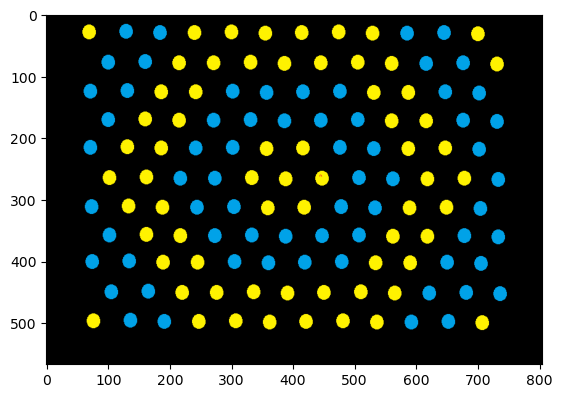

In [2]:
img = io.imread('/dh-projects/ag-ishaque/analysis/anastasiia/projects/sonar/test/showcases/img/showcase8.png')
plt.imshow(img)

In [86]:
# Open the image
image = Image.open('/dh-projects/ag-ishaque/analysis/anastasiia/projects/sonar/test/showcases/img/showcase7.png')

# Convert RGBA to RGB
rgb_image = image.convert('RGB')


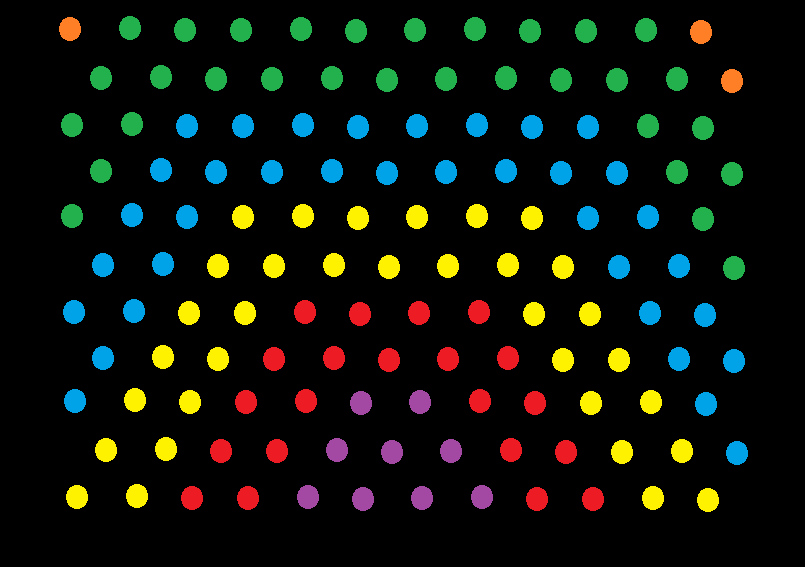

In [99]:
image

In [87]:
rgb_image = np.array(rgb_image)

In [88]:
# Reshape the array to a 2D array of pixels (height * width, channels)
pixels = rgb_image.reshape((-1, 3))

# Find unique colors
unique_colors = np.unique(pixels, axis=0)

In [135]:
# Create an empty 3D tensor with the shape of the original image
integer_map = np.zeros((rgb_image.shape[0], rgb_image.shape[1],len(unique_colors)), dtype=int)

# Iterate through the unique color values and assign index values to the tensor
for index, color in enumerate(unique_colors):
    condition = np.all(rgb_image == color[np.newaxis, np.newaxis, :], axis=2)
    integer_map[condition,index] = 1  # Adding 1 to start indices from 1
    # integer_map = integer_map.astype(int) # converting bool array to an int array
integer_map = integer_map.transpose(2, 0, 1) # switching shape to the manner that is required for sonar


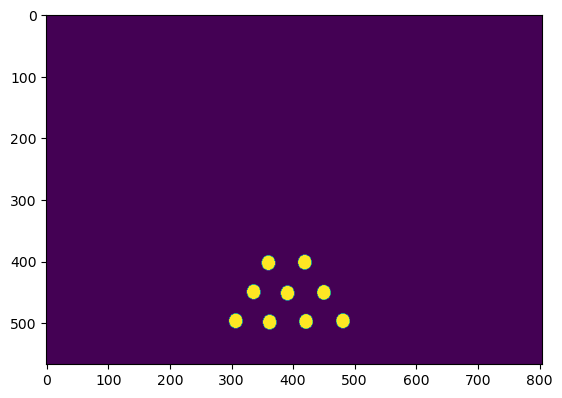

In [139]:
plt.imshow(integer_map[3,:,:])

In [150]:
# Path to the folder containing your samples
folder_path = '/dh-projects/ag-ishaque/analysis/anastasiia/projects/sonar/test/showcases/img'

# List all files in the folder
file_names = os.listdir(folder_path)
# Dictionary to store images
images = {}

# Loop through the files
for file_name in file_names:
    if ".png" in file_name:
        # Construct the full path to the file
        file_path = os.path.join(folder_path, file_name)
       
        # Open the image using PIL
        image = Image.open(file_path)
        
        # Store the image in the dictionary with its filename as the key
        images[file_name] = image
        

In [154]:
images


{'bg.png': <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=7344x4920>,
 'showcase5.png': <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=5776x3052>,
 'showcase9.png': <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=805x567>,
 'showcase8.png': <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=805x567>,
 'showcase1.png': <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=5768x2256>,
 'blood_ves_and_bg.png': <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=7344x4920>,
 'showcase3.png': <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=6944x1840>,
 'rainbow_circles.png': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=836x454>,
 'showcase7.png': <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=805x567>,
 'showcase2.png': <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=5776x3052>,
 'showcase4.png': <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=7000x2144>,
 'showcase10.png': <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=1341x5

In [140]:
# # Open the image
# img = Image.open('/dh-projects/ag-ishaque/analysis/anastasiia/projects/sonar/test/showcases/img/showcase7.png')

def img2tensor(image):
    # Convert RGBA to RGB
    rgb_image = image.convert('RGB')
    rgb_image = np.array(rgb_image)
    # Reshape the array to a 2D array of pixels (height * width, channels)
    pixels = rgb_image.reshape((-1, 3))

    # Find unique colors
    unique_colors = np.unique(pixels, axis=0)

    # Create an empty 3D tensor with the shape of the original image
    integer_map = np.zeros((rgb_image.shape[0], rgb_image.shape[1],len(unique_colors)), dtype=int)

    # Iterate through the unique color values and assign color values to the tensor
    for index, color in enumerate(unique_colors):
        condition = np.all(rgb_image == color[np.newaxis, np.newaxis, :], axis=2)
        integer_map[condition,index] = True  # Adding 1 to start indices from 1
    integer_map = integer_map.transpose(2, 0, 1) # switching shape to the manner that is required for sonar

    return integer_map

In [156]:
img = images['blood_ves_and_bg.png']
eg = img2tensor(img)

# Create subplots
fig, axes = plt.subplots(2, 3)

# Display different layers of integer_map in each subplot
for i, ax in enumerate(axes.flat):
    ax.imshow(integer_map[:, :, i+1])
    ax.set_title(f'Layer {i + 1}')  # Set subplot title

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

/tmp/ipykernel_1599459/2372150518.py:10: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


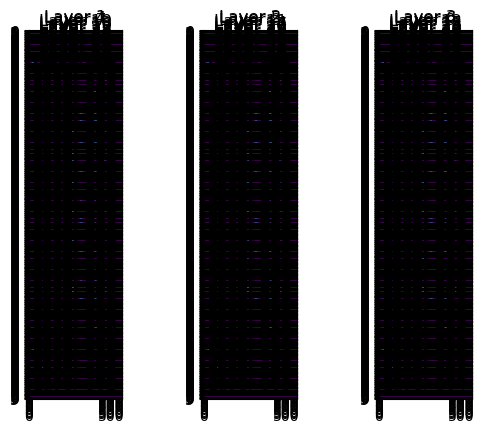

In [155]:
# Create subplots
fig, axes = plt.subplots(2, 3)

# Display different layers of integer_map in each subplot
for i, ax in enumerate(axes.flat):
    ax.imshow(integer_map[:, :, i+1])
    ax.set_title(f'Layer {i + 1}')  # Set subplot title

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()